## Knowing the data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Reading in the dataset
df = pd.read_csv('data.csv')

# the first 4 rows
df.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [4]:
# general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# summary statistics
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Explatory Data Analysis

### The dataset contains 79 independent variables. For the sake of this project we shall focus on 12 independent variables because including all of them would lengthen the training time of the model.

### We shall focus on LotFrontage, LotArea, street, MasVnrArea, BsmtFinSF1, BsmtFinsF2, CentralAir, 1stFlrSF, 2ndFlrSF, Fireplaces, GarageCars, PavedDrive.

### In EDA we shall focus on these 12 variables

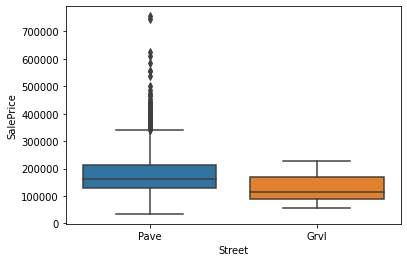

In [7]:
# we want to see how street is distributed against the saleprice
# we can see from the boxplot that pave has the highest median score than gravel
ax = sns.boxplot(x="Street", y="SalePrice", data=df)

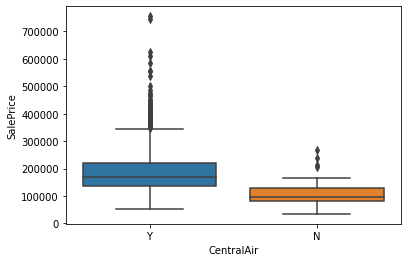

In [8]:
# we want to see how central Air is distributed against saleprice
# we see that Yes has the highest median score
ax = sns.boxplot(x="CentralAir", y="SalePrice", data=df)

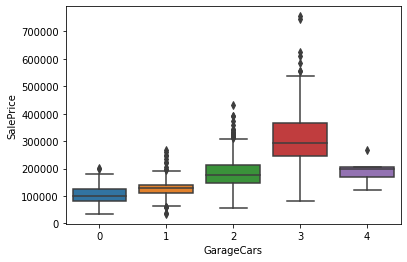

In [9]:
# we want to see how garagecars is distributed against saleprice
# we see that a 3 garage house has the highest median score.
ax = sns.boxplot(x="GarageCars", y="SalePrice", data=df)

In [30]:
# create new df
df1 = df[["LotFrontage", "LotArea", "Street", "MasVnrArea", "BsmtFinSF1",
         "BsmtFinSF2", "CentralAir", "1stFlrSF", "2ndFlrSF", "Fireplaces",
         "GarageCars", "PavedDrive", "SalePrice"]]

df1.head(3)

,LotFrontage,LotArea,Street,MasVnrArea,BsmtFinSF1,BsmtFinSF2,CentralAir,1stFlrSF,2ndFlrSF,Fireplaces,GarageCars,PavedDrive,SalePrice
0,65.0,8450,Pave,196.0,706,0,Y,856,854,0,2,Y,208500
1,80.0,9600,Pave,0.0,978,0,Y,1262,0,1,2,Y,181500
2,68.0,11250,Pave,162.0,486,0,Y,920,866,1,2,Y,223500


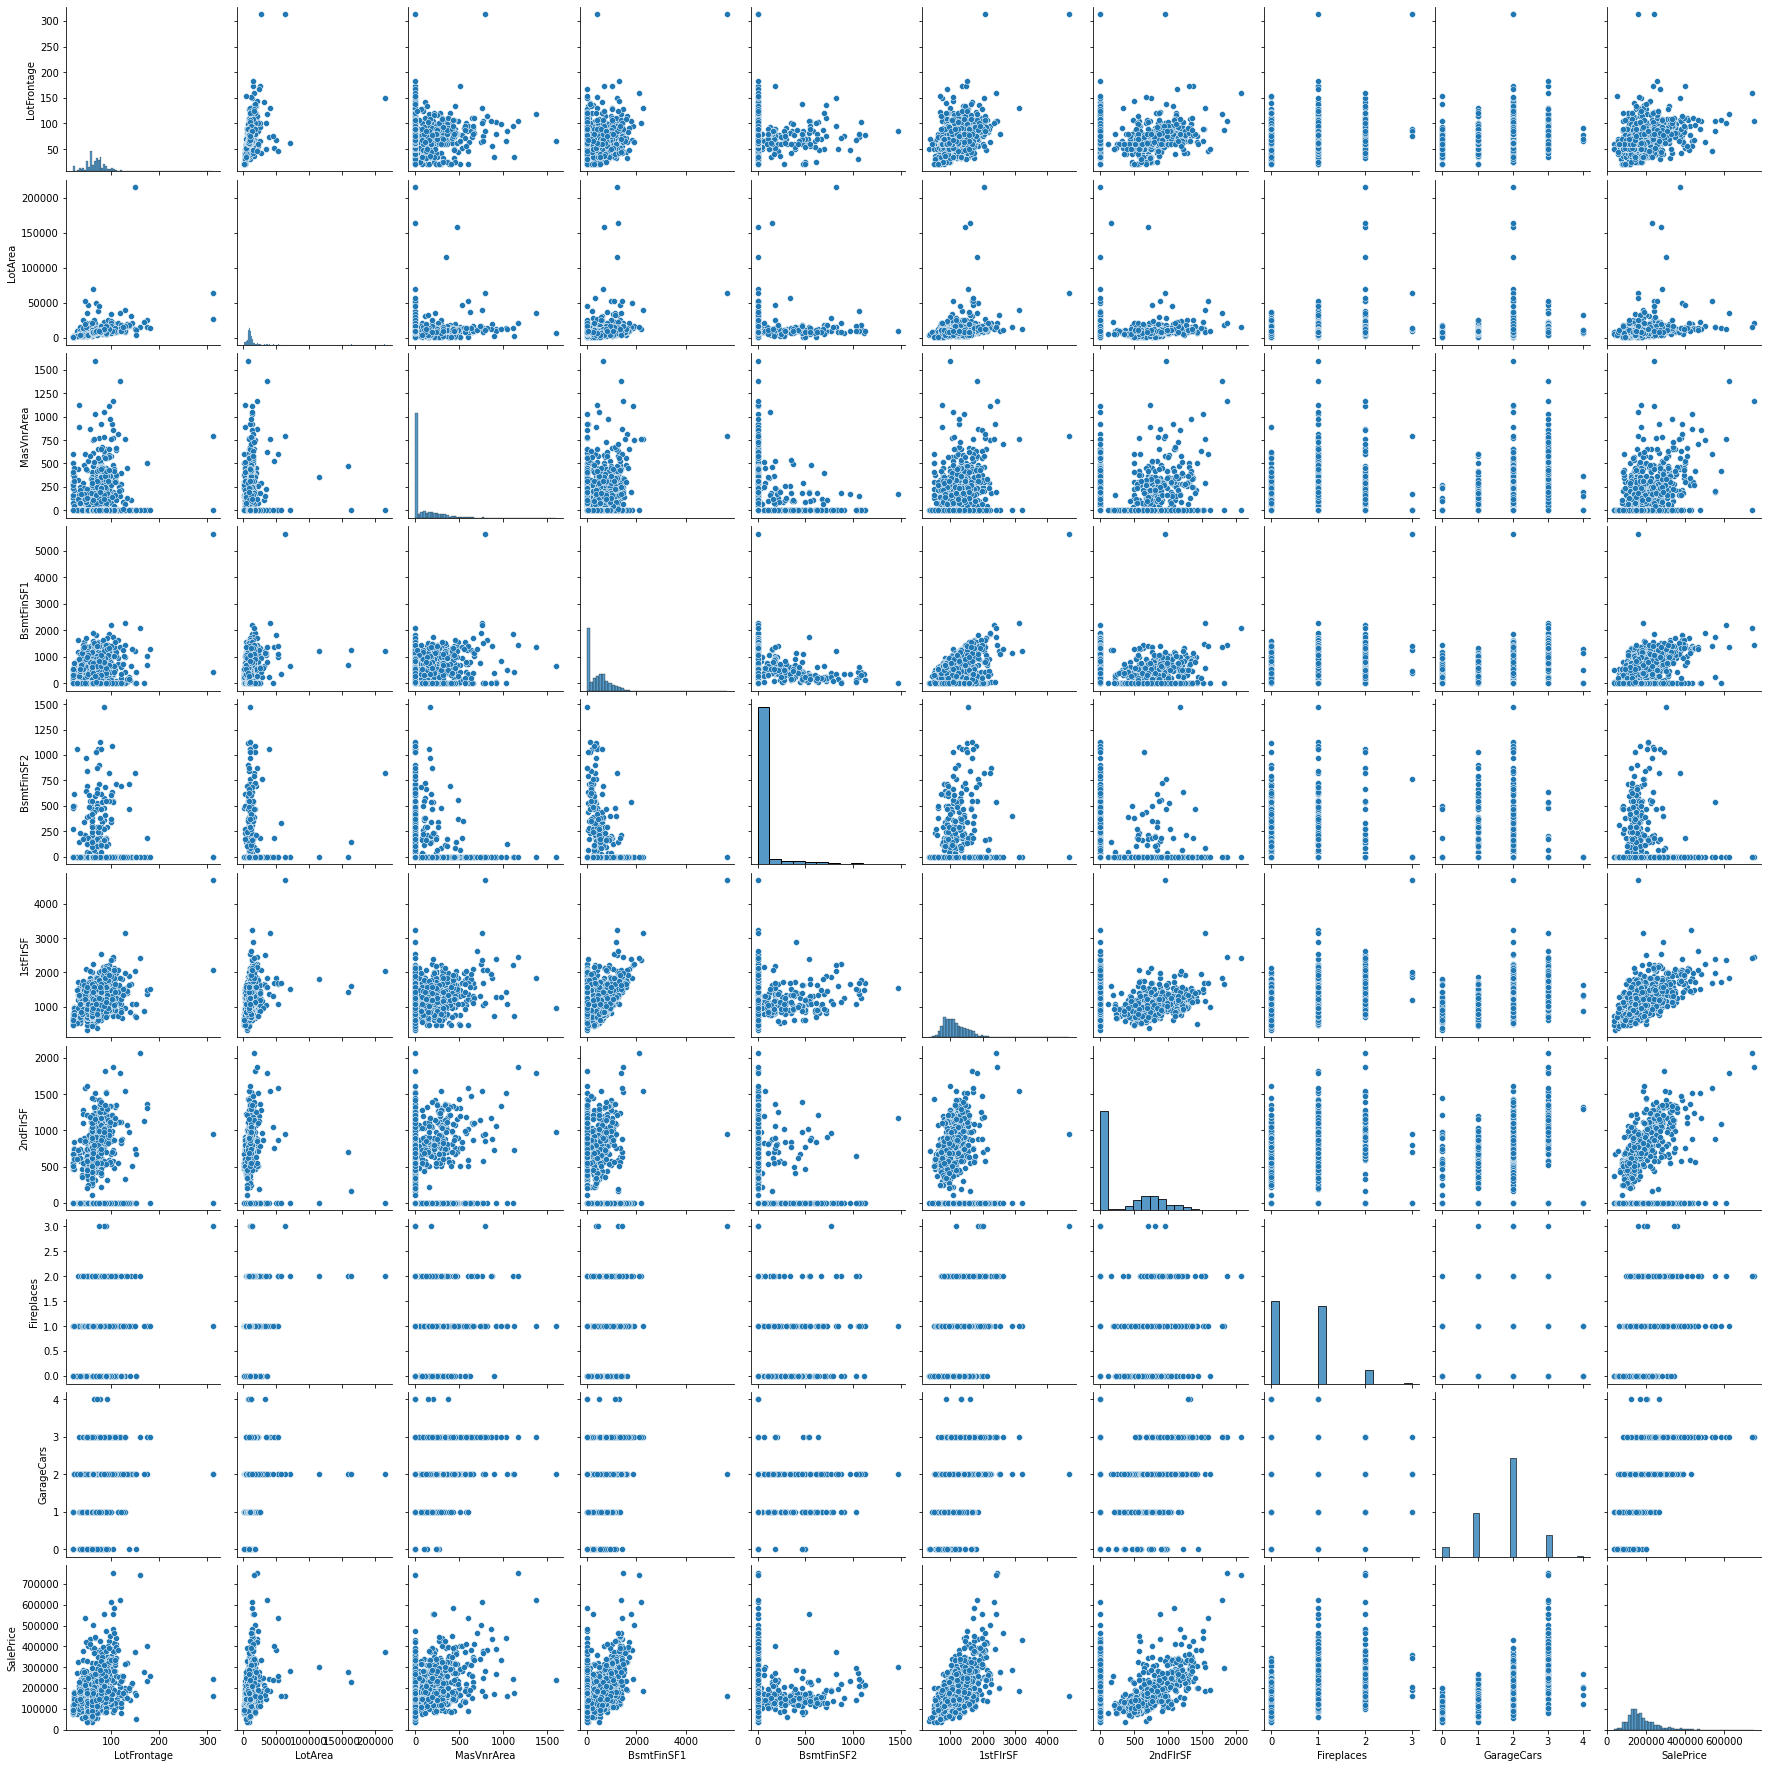

In [26]:
# scatter matrix for the independent variables against saleprice
sns.pairplot(df1)

### From the above scatter matrix we can see that 1stFlrSF, 2ndFlrSF, LotFrontage, and LotArea are postively correlated with SalePrice. From this information we will apply regression techniques to predict salePrice of houses

## Data Preprocessing

### For this project we shall create dummy variables for Street and Central Air

In [32]:
df1 = pd.get_dummies(df1, columns=['Street', 'CentralAir', 'PavedDrive'])
df1.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,1stFlrSF,2ndFlrSF,Fireplaces,GarageCars,SalePrice,Street_Grvl,Street_Pave,CentralAir_N,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,65.0,8450,196.0,706,0,856,854,0,2,208500,0,1,0,1,0,0,1
1,80.0,9600,0.0,978,0,1262,0,1,2,181500,0,1,0,1,0,0,1
2,68.0,11250,162.0,486,0,920,866,1,2,223500,0,1,0,1,0,0,1
3,60.0,9550,0.0,216,0,961,756,1,3,140000,0,1,0,1,0,0,1
4,84.0,14260,350.0,655,0,1145,1053,1,3,250000,0,1,0,1,0,0,1


In [42]:
# check missing values
df1.isnull().sum()

LotFrontage     0
LotArea         0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
1stFlrSF        0
2ndFlrSF        0
Fireplaces      0
GarageCars      0
SalePrice       0
Street_Grvl     0
Street_Pave     0
CentralAir_N    0
CentralAir_Y    0
PavedDrive_N    0
PavedDrive_P    0
PavedDrive_Y    0
dtype: int64

In [41]:
# drop nan values
df1.dropna(inplace=True)

In [43]:
# Feature selection
y = df1['SalePrice']
X = df1.drop('SalePrice', axis=1)

In [44]:
# splitting data to trainset and test set
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(836, 16) (359, 16) (836,) (359,)


## Regression Models

### Linear Regression

In [46]:
# library
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# instatiate a model
mdl1 = LinearRegression()

# fit the model
mdl1.fit(Xtrain, ytrain)

# predict the model
ypred1 = mdl1.predict(Xtest)

# accuracy score using the RMSE(Rootmeansquarederror)
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, ypred1)))

RMSE: 43964.6693191075


### Lasso Regression

In [48]:
# library
from sklearn.linear_model import Lasso

# instatiate a model
mdl2 = Lasso()

# fit the model
mdl2.fit(Xtrain, ytrain)

# predict the model
ypred2 = mdl2.predict(Xtest)

# accuracy score using the RMSE(Rootmeansquarederror)
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, ypred2)))

RMSE: 43960.916085620134


### Ridge Regression

In [49]:
# library
from sklearn.linear_model import Ridge

# instatiate a model
mdl3 = Ridge()

# fit the model
mdl3.fit(Xtrain, ytrain)

# predict the model
ypred3 = mdl3.predict(Xtest)

# accuracy score using the RMSE(Rootmeansquarederror)
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, ypred3)))

RMSE: 43955.302357977765


### Randomforest regressor

In [50]:
# random forest regressor library
from sklearn.ensemble import RandomForestRegressor

# instatiate a model
mdl4 = RandomForestRegressor()

# fit the model
mdl4.fit(Xtrain, ytrain)

# predict the model
ypred4 = mdl4.predict(Xtest)

# accuracy score using the RMSE(Rootmeansquarederror)
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, ypred4)))

RMSE: 41713.82563615986


### From the above we see the RMSE for the models as follows
####    Linear Regression : 43960.9161
####    Lasso Regression: 43960.9161
####    Ridge Regression: 43955.3024
####    Random Forest Regression: 41713.8256

#### From the above models we see that Linear regression has the highest RMSE and the Random Forest Regressor lowest RMSE. The rule of thumb in Regression is that the lower the RMSE the better the model. We can conclude that Random Regressor is best suited for this data because it is the best performing model.